In [98]:
#steps: 
# import dataset
# divided into independent and dependent features
# data cleaning i.e. apply stemming ,stopwords
# fix a sentence length to fix input
# one hot representation
# embedding layer created
# LSTM neural network is created

In [99]:
import pandas as pd

In [100]:
path = 'C:/Users/akirt/FakeNewsClassification/train.csv' 
df = pd.read_csv(path, sep=';', names=["id","title","text", "label"],header=0)

In [181]:
df.head()

,id,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [182]:
df.shape

(24353, 4)

In [183]:
df.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [184]:
### Drop Nan Values
df=df.dropna()

In [185]:
df.head()

,id,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [186]:
##Get the Independent Features
X = df.drop('label',axis=1) ## except label everything will be in X

In [187]:
## Get the dependent features
y=df['label']

In [188]:
X.shape

(24353, 3)

In [189]:
y.shape

(24353,)

In [190]:
import tensorflow as tf

In [191]:
print(tf.__version__)

2.18.0


In [192]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [193]:
## Vocabulary_size
voc_size = 5000 #unique words in dictionary

In [194]:
#Onehot representation
messages = X.copy()
messages['title'][1] # considering title to train our model as text has large database

"China says Trump call with Taiwan president won't change island's status"

In [195]:
#messages.reset_index(inplace=True)

In [196]:
messages

,id,title,text
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s..."
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...
...,...,...,...
24348,24348,Mexico Senate committee OK's air transport dea...,MEXICO CITY (Reuters) - A key committee in Mex...
24349,24349,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...
24350,24350,trump breaks from stump speech to admire beaut...,kremlin nato was created for agression \nruss...
24351,24351,NFL PLAYER Delivers Courageous Message: Stop B...,Dallas Cowboys star wide receiver Dez Bryant t...


In [197]:
import re
import nltk
from nltk.corpus import stopwords

In [198]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akirt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [199]:
#dataset preprocessing
from nltk.stem.porter import PorterStemmer
portstemming = PorterStemmer()
corpus=[]

In [200]:
#stemming for all the words in title,stopwords
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ' , messages['title'][i]) ##other than ato z and A to Z remove all special characters
    review = review.lower() # lower all letters
    review = review.split() ## split each and every sentence
    ##removing stopwords
    review = [portstemming.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [201]:
corpus[1]

'china say trump call taiwan presid chang island statu'

In [202]:
#ONE hot representation on title is performed
# for each word in corpus, voc_size has an index for each word, that index is provided 
onehot_repr =[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[52, 2509, 3294, 3285, 3093, 23, 3915, 3493],
 [4489, 3605, 3915, 345, 972, 1483, 1465, 726, 2447],
 [448, 3915, 491, 2701, 4941, 2436, 745],
 [3419, 4268, 1423, 4489, 56, 467, 1956, 836, 3605],
 [2791, 1483, 4698, 3290, 2852, 2005, 1292, 1051, 4777, 1483],
 [3902, 1143, 1474, 1923, 2629, 1630, 1432, 3857, 2048],
 [3996, 1068, 2396, 312, 276, 166, 639, 3159, 543, 2347, 3938, 538],
 [118, 3083, 932, 3915, 3082, 801, 4416, 1974, 522, 1909],
 [3915, 1245, 4612, 605, 4146, 4500, 3518, 3083, 3880, 1117],
 [1487, 2191, 2578, 2093, 4946, 4660, 3915],
 [4840, 4994, 2616, 1443, 4055, 2214, 3944],
 [163, 1520, 932, 2746, 3843, 2867, 2323, 246, 3852],
 [2172, 3083, 1827, 4507, 1127, 1887, 4197, 108, 4245, 16, 1161],
 [3996, 118, 2565, 4286, 4005, 1374, 4764, 615, 2172, 4119, 118, 3777],
 [4182, 147, 1676, 4717, 3115, 4612, 3456, 1541, 2907, 3442, 184],
 [4970, 4117, 1791, 3605, 3915, 1319, 3141, 1560, 789],
 [1626, 1884, 2585, 3777, 4684, 3750, 573, 2180, 1397],
 [2438, 8, 3903, 3083, 4785, 3827

In [203]:
onehot_repr[1]

[4489, 3605, 3915, 345, 972, 1483, 1465, 726, 2447]

In [204]:
#Embedding Representation
sent_length = 20 # max length is considered as length of all sentences should be same
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...   23 3915 3493]
 [   0    0    0 ... 1465  726 2447]
 [   0    0    0 ... 4941 2436  745]
 ...
 [   0    0    0 ...  143 3915 2824]
 [   0    0    0 ... 4255 1521  895]
 [   0    0    0 ... 4139 2086 2581]]


In [205]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   52, 2509, 3294, 3285, 3093,   23, 3915, 3493])

In [206]:
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       4489, 3605, 3915,  345,  972, 1483, 1465,  726, 2447])

In [207]:
## Creating LSTM model
embedding_vector_features = 40 #each word represented by 40 features[as in word2vec and other algos] 
#hyperparameter tuning it can be 40,50,60
#feature representation = 40 i.e each and every word will be converted in 40 size vector 
model=Sequential()

In [208]:
model.add(Embedding(voc_size,embedding_vector_features,input_shape=(sent_length,))) #embedding layer created
#Adding dropout, it may increase accuracy
model.add(Dropout(0.3)) # 30% of LSTM will be disabled while training,will reduce overfitting
model.add(LSTM(100)) #hyperparameter tunning can be 100,200,300, 100 IT is a number of LSTM units (hidden size), can be tuned
model.add(Dropout(0.3))

C:\Users\akirt\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [209]:
model.add(Dense(1,activation='sigmoid')) #as binary label feature activation function used is sigmoid
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 
# output is binary so binary_crossentropy
# adam optimizer and accuracy metrics is used

In [210]:
model.build(input_shape=(None, sent_length))
print(model.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 20, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 20, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

None


In [211]:
len(embedded_docs), y.shape

(24353, (24353,))

In [212]:
#converting features into numpy array
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [213]:
X_final.shape,y_final.shape

((24353, 20), (24353,))

In [214]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [215]:
#finally training model i.e fitting the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.7546 - loss: 0.4714 - val_accuracy: 0.9077 - val_loss: 0.2217
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.9253 - loss: 0.1869 - val_accuracy: 0.9095 - val_loss: 0.2155
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.9463 - loss: 0.1482 - val_accuracy: 0.9103 - val_loss: 0.2320
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.9576 - loss: 0.1144 - val_accuracy: 0.9102 - val_loss: 0.2261
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.9643 - loss: 0.0966 - val_accuracy: 0.9042 - val_loss: 0.2542
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9715 - loss: 0.0807 - val_accuracy: 0.9062 - val_loss: 0.2534
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.9757 - loss: 0.0677 - val_accuracy: 0.9017 - val_loss: 0.2803
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.9764 - loss: 0.0656 - 

In [216]:
#Performance metrics and accuracy
y_pred=model.predict(X_test)

252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


AUC: 0.8993964271944801


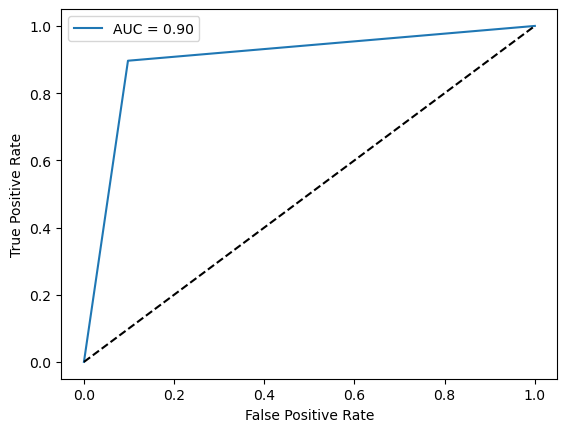

In [217]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = np.where(y_pred > 0.6,1,0) #thresholding at 0.6 instead of normal 0.5
#When to use thresholding (np.where)
#If you want final class predictions (e.g. accuracy, confusion matrix).
#You can experiment with different thresholds (0.5, 0.6, 0.7) 
#depending on whether you want to reduce false positives or false negatives.

#For AUC-ROC → keep probabilities.
#For accuracy/precision/recall → threshold with np.where.

#AUC ROC curve #The ROC curve (and AUC score) needs the continuous probabilities, not the binarized labels.
# Compute AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [218]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3253,  352],
       [ 459, 3973]], dtype=int64)

In [219]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8990917008834142

In [220]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3605
           1       0.92      0.90      0.91      4432

    accuracy                           0.90      8037
   macro avg       0.90      0.90      0.90      8037
weighted avg       0.90      0.90      0.90      8037



In [221]:
#What is AUC-ROC?
#1. ROC Curve (Receiver Operating Characteristic)
#It’s a graph that shows how well your classifier can distinguish between positive (1) and negative (0) classes.
#X-axis = False Positive Rate (FPR)
#Y-axis = True Positive Rate (TPR = Recall)
#Each point on the curve corresponds to a different threshold used to turn predicted probabilities into class labels.
#So instead of fixing the threshold at 0.5, ROC shows performance across all thresholds.

#2. AUC (Area Under the Curve)
#The area under the ROC curve is a single number that summarizes the classifier’s ability to discriminate between the two classes.
#Range:
#AUC = 1.0 → Perfect classifier 
#AUC = 0.5 → Random guessing (no skill)
#AUC < 0.5 → Worse than random (predicting the opposite would be better!)

#Why is AUC-ROC useful?
#Threshold independent (unlike accuracy).
#Class imbalance tolerant (better than accuracy when one class dominates).
#Widely used for binary classification in ML, NLP, healthcare, fraud detection, etc.

In [222]:
##Bidirectional Lstm RNN

In [223]:
## check data set is balanced or not
y.value_counts()

label
1    13246
0    11107
Name: count, dtype: int64

In [233]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional,Dense,Dropout,Embedding

In [234]:
##vocabulary size
voc_size=5000

In [235]:
messages=X.copy()

In [236]:
onehot_repr

[[52, 2509, 3294, 3285, 3093, 23, 3915, 3493],
 [4489, 3605, 3915, 345, 972, 1483, 1465, 726, 2447],
 [448, 3915, 491, 2701, 4941, 2436, 745],
 [3419, 4268, 1423, 4489, 56, 467, 1956, 836, 3605],
 [2791, 1483, 4698, 3290, 2852, 2005, 1292, 1051, 4777, 1483],
 [3902, 1143, 1474, 1923, 2629, 1630, 1432, 3857, 2048],
 [3996, 1068, 2396, 312, 276, 166, 639, 3159, 543, 2347, 3938, 538],
 [118, 3083, 932, 3915, 3082, 801, 4416, 1974, 522, 1909],
 [3915, 1245, 4612, 605, 4146, 4500, 3518, 3083, 3880, 1117],
 [1487, 2191, 2578, 2093, 4946, 4660, 3915],
 [4840, 4994, 2616, 1443, 4055, 2214, 3944],
 [163, 1520, 932, 2746, 3843, 2867, 2323, 246, 3852],
 [2172, 3083, 1827, 4507, 1127, 1887, 4197, 108, 4245, 16, 1161],
 [3996, 118, 2565, 4286, 4005, 1374, 4764, 615, 2172, 4119, 118, 3777],
 [4182, 147, 1676, 4717, 3115, 4612, 3456, 1541, 2907, 3442, 184],
 [4970, 4117, 1791, 3605, 3915, 1319, 3141, 1560, 789],
 [1626, 1884, 2585, 3777, 4684, 3750, 573, 2180, 1397],
 [2438, 8, 3903, 3083, 4785, 3827

In [237]:
## Creating LSTM model
embedding_vector_features = 40 #each word represented by 40 features[as in word2vec and other algos] 
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_shape=(sent_length,))) #embedding layer created
#100 neurons forward 100 backwards
model.add(Bidirectional(LSTM(100))) #hyperparameter tunning can be 100,200,300, 100 IT is a number of LSTM units (hidden size), can be tuned
model.add(Dense(1,activation='sigmoid')) #as binary label feature activation function used is sigmoid
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 
print(model.summary())

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 20, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │         112,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 313,001 (1.19 MB)

 Trainable params: 313,001 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

None


In [238]:
#finally training model i.e fitting the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.7704 - loss: 0.4424 - val_accuracy: 0.9095 - val_loss: 0.2256
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.9377 - loss: 0.1672 - val_accuracy: 0.9149 - val_loss: 0.2117
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9605 - loss: 0.1132 - val_accuracy: 0.9102 - val_loss: 0.2344
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9666 - loss: 0.0937 - val_accuracy: 0.9044 - val_loss: 0.2618
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.9763 - loss: 0.0715 - val_accuracy: 0.9031 - val_loss: 0.2812
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9809 - loss: 0.0541 - val_accuracy: 0.9003 - val_loss: 0.3650
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.9847 - loss: 0.0488 - val_accuracy: 0.9000 - val_loss: 0.4139
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.9861 - loss: 0.0408 - 

In [239]:
#Performance metrics and accuracy
y_pred=model.predict(X_test)

252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [240]:
y_pred #values in terms of probabilities

array([[1.7483073e-06],
       [2.5535952e-03],
       [9.9999756e-01],
       ...,
       [1.0000000e+00],
       [6.3571584e-05],
       [8.2852848e-02]], dtype=float32)

In [246]:
y_pred = np.where(y_pred>=0.5,1,0) # in form of true false 0/1, binary labels

In [242]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [243]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3155,  450],
       [ 404, 4028]], dtype=int64)

In [244]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8937414458131143

In [245]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3605
           1       0.90      0.91      0.90      4432

    accuracy                           0.89      8037
   macro avg       0.89      0.89      0.89      8037
weighted avg       0.89      0.89      0.89      8037

